In [62]:
import wandb
api = wandb.Api()

sweep_id = 'zftou44c'
sweep = api.sweep(f"nicoweio/dsea-corn/{sweep_id}")

f"{len(sweep.runs)} runs"

'15 runs'

In [63]:
sweep.runs[0].state

'running'

In [64]:
# filter successful runs
runs = filter(lambda run: run.state == 'finished', sweep.runs)

runs = sorted(runs,
  key=lambda run: run.summary['test/wd_mean'], reverse=False)
wd_test = runs[0].summary['test/wd_mean']
print(f"Best run {runs[0].name} with {wd_test:.4f} wasserstein distance")

f"{len(runs)} finished runs"

Best run treasured-sweep-4 with 0.0068 wasserstein distance


'13 finished runs'

In [66]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame([dict(run.summary) | dict(run.config) for run in runs])
# df

<AxesSubplot:xlabel='batch_size', ylabel='test/wd_mean'>

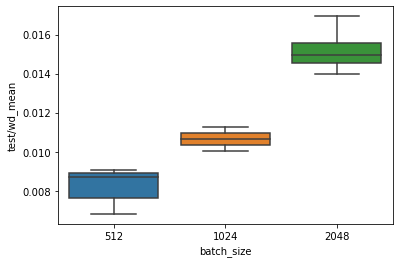

In [68]:
# sns.violinplot(data=df, y='test/wd_mean', x='batch_size')
sns.boxplot(data=df, y='test/wd_mean', x='batch_size')

In [54]:
# sns.boxplot(data=df, y='test/wd_all', x='batch_size')

# Each run has multiple values for metrics like wd_all
# Create a new dataframe with one row per *metric*
# The columns shall get the suffix '_single', e.g. wd_all_single

data_list = []
for run in runs:
    metric_keys = [key for key in run.summary.keys() if key.endswith('_all')]
    metric_lengths = [len(run.summary[key]) for key in metric_keys]
    assert len(set(metric_lengths)) == 1, "Not all metrics have same length"
    for i in range(metric_lengths[0]):
        data = {}
        for key in metric_keys:
            newkey = key.replace('_all', '_single')
            data[newkey] = run.summary[key][i]
        data_list.append(
            data | dict(run.config)
        )

df_single = pd.DataFrame(data_list)

,test/rmse_single,test/accuracy_single,test/chi2_single,test/jaccard_single,test/wd_single,alpha,nrows,epsilon,J_factor,num_bins,...,num_epochs,num_workers,fixweighting,hidden_units,learning_rate,stratify_test,stratify_train,crossval_n_splits,num_dsea_iterations,num_bootstrap_iterations
0,0.020884,0.30282,0.048540,0.178425,0.010972,0,500000,3.608633e-03,10,10,...,12,48,always,"[120, 240, 120, 12]",0.000848,False,False,10,20,50
1,0.017659,0.31962,0.029136,0.190207,0.004722,0,500000,3.608633e-03,10,10,...,12,48,always,"[120, 240, 120, 12]",0.000848,False,False,10,20,50
2,0.016322,0.31662,0.020778,0.188086,0.007844,0,500000,3.608633e-03,10,10,...,12,48,always,"[120, 240, 120, 12]",0.000848,False,False,10,20,50
3,0.019233,0.30768,0.031905,0.181810,0.004192,0,500000,3.608633e-03,10,10,...,12,48,always,"[120, 240, 120, 12]",0.000848,False,False,10,20,50
4,0.017097,0.31952,0.021771,0.190136,0.006006,0,500000,3.608633e-03,10,10,...,12,48,always,"[120, 240, 120, 12]",0.000848,False,False,10,20,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.027447,0.30764,0.080216,0.181782,0.014042,0,500000,1.570501e-10,10,10,...,9,48,always,"[120, 240, 120, 12]",0.000892,False,False,10,20,50
86,0.030075,0.30598,0.087753,0.180624,0.014950,0,500000,1.570501e-10,10,10,...,9,48,always,"[120, 240, 120, 12]",0.000892,False,False,10,20,50
87,0.030042,0.31052,0.109754,0.183796,0.014614,0,500000,1.570501e-10,10,10,...,9,48,always,"[120, 240, 120, 12]",0.000892,False,False,10,20,50
88,0.023923,0.31542,0.060444,0.187240,0.012585,0,500000,1.570501e-10,10,10,...,9,48,always,"[120, 240, 120, 12]",0.000892,False,False,10,20,50


<AxesSubplot:xlabel='J_factor', ylabel='test/wd_mean'>

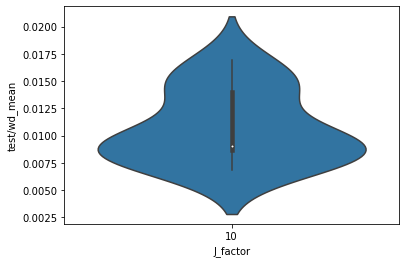

In [69]:
sns.violinplot(data=df, y='test/wd_mean', x='J_factor')
# sns.violinplot(data=df_single, y='test/wd_single', x='J_factor')

<AxesSubplot:xlabel='epsilon', ylabel='test/wd_mean'>

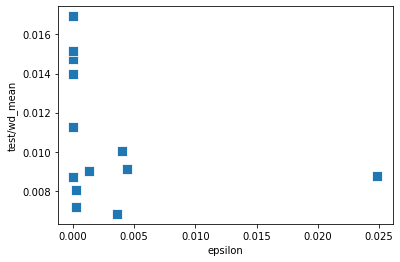

In [70]:
sns.scatterplot(data=df, y='test/wd_mean', x='epsilon', s=100, marker='s')

<AxesSubplot:xlabel='learning_rate', ylabel='test/wd_mean'>

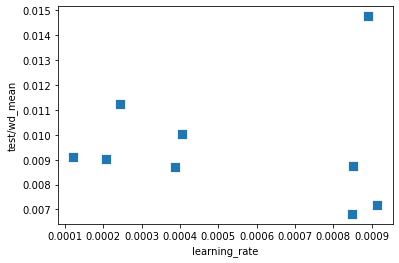

In [35]:
sns.scatterplot(data=df, y='test/wd_mean', x='learning_rate', s=100, marker='s')

<AxesSubplot:xlabel='num_epochs', ylabel='test/wd_single'>

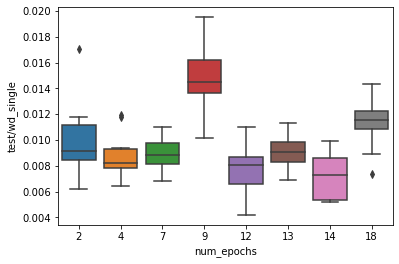

In [72]:
# sns.boxplot(data=df, y='test/wd_mean', x='num_epochs')
sns.boxplot(data=df_single, y='test/wd_single', x='num_epochs')

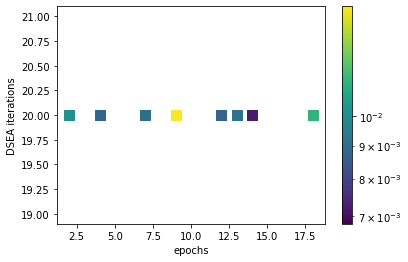

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

runs_epochs = np.array([run.config['num_epochs'] for run in runs])
runs_dsea_iterations = np.array([run.config['num_dsea_iterations'] for run in runs])
runs_wd = np.array([run.summary['test/wd_mean'] for run in runs])

plt.scatter(runs_epochs, runs_dsea_iterations, c=runs_wd, s=100, marker='s', norm=matplotlib.colors.LogNorm())
plt.xlabel("epochs")
plt.ylabel("DSEA iterations")
plt.colorbar()
plt.show()

In [30]:
import seaborn as sns

runs_k = np.array([run.summary.get('k', np.nan) for run in runs])

sns.histplot(runs_k, bins=np.arange(0, runs_k.max()+1))
plt.xlabel("Number of actual DSEA iterations $k$")
plt.ylabel("count")
plt.tight_layout()
plt.savefig("k.pdf")
plt

ValueError: arange: cannot compute length

In [73]:
my_wd = [dict(**run.config, wd_test=run.summary['wd_test']) for run in runs if run.state == 'finished' and run.summary.wd_test <= 0.015]

# my_wd2 = {
#     'wd_test': [run['wd_test'] for run in my_wd],
#     'J_factor': [run['J_factor'] for run in my_wd],
# }

my_wd2 = {
    key: [run[key] for run in my_wd]
    for key in my_wd[0].keys()
}

# sns.histplot(wd_per_J_factor, stat="percent", common_norm=False, multiple="stack", shrink=.8)
sns.violinplot(data=my_wd2, x='J_factor', y='wd_test')
# sns.violinplot(data=my_wd2, x='num_dsea_iterations', y='wd_test')
plt.xlabel("J_factor")
plt.ylabel("Wasserstein distance")
# plt.savefig("wd_per_J_factor.pdf")
plt


KeyError: 'wd_test'

In [8]:
sweep_fixweighting = api.sweep(f"nicoweio/dsea-corn/qwvk5wcy")

wd_per_fixweighting = {key: np.array([run.summary.get('wd_test', np.nan) for run in sweep_fixweighting.runs if run.state == 'finished' and run.config['fixweighting'] == key]) for key in ['always', 'iter', 'never']}

<module 'matplotlib.pyplot' from '/scratch/nweitkemper/envs/dsea/lib/python3.9/site-packages/matplotlib/pyplot.py'>

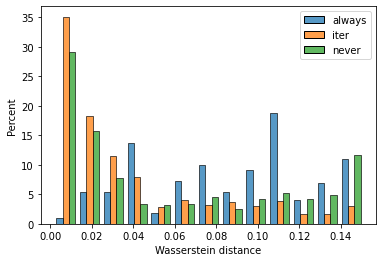

In [9]:
sns.histplot(wd_per_fixweighting, stat="percent", common_norm=False, multiple="dodge", shrink=.8)
plt.xlabel("Wasserstein distance")
plt.savefig("wd_per_fixweighting.pdf")
plt